In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Importing Dataset

In [5]:
df = pd.read_csv("Horizon_Studio_Stats_A.csv")

# Phase 1: Data Cleaning & Preparation


In [6]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632798 entries, 0 to 632797
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    569723 non-null  float64
 1   title                 632793 non-null  object 
 2   vote_average          632798 non-null  float64
 3   vote_count            632798 non-null  int64  
 4   status                632798 non-null  object 
 5   release_date          531422 non-null  object 
 6   revenue               632798 non-null  object 
 7   runtime               632798 non-null  int64  
 8   adult                 632798 non-null  bool   
 9   backdrop_path         226759 non-null  object 
 10  budget                632798 non-null  int64  
 11  homepage              75306 non-null   object 
 12  imdb_id               371713 non-null  object 
 13  original_language     632798 non-null  object 
 14  original_title        632793 non-null  object 
 15  

In [8]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (632798, 24)

Data Types:
 id                      float64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                  object
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

Missing Values:
 id                       63075
title                        5
vote_average                 0
vote_count                   0
status                       0
release_dat

In [9]:
# List of columns to drop
columns_to_drop = [
    'id', 'imdb_id', 'backdrop_path', 'poster_path', 'homepage',
     'overview'
    , 'keywords'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, errors='ignore')  

print("--- Remaining Columns ---")
print(df.columns.tolist())


--- Remaining Columns ---
['title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'budget', 'original_language', 'original_title', 'popularity', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']


In [10]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,$ 825532764.0,148,False,160000000,en,Inception,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,$ 701729206.0,169,False,165000000,en,Interstellar,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,$ 1004558444.0,152,False,185000000,en,The Dark Knight,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,$ 2923706026.0,162,False,237000000,en,Avatar,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,$ 1518815515.0,143,False,220000000,en,The Avengers,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632798 entries, 0 to 632797
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 632793 non-null  object 
 1   vote_average          632798 non-null  float64
 2   vote_count            632798 non-null  int64  
 3   status                632798 non-null  object 
 4   release_date          531422 non-null  object 
 5   revenue               632798 non-null  object 
 6   runtime               632798 non-null  int64  
 7   adult                 632798 non-null  bool   
 8   budget                632798 non-null  int64  
 9   original_language     632798 non-null  object 
 10  original_title        632793 non-null  object 
 11  popularity            632798 non-null  float64
 12  tagline               115533 non-null  object 
 13  genres                419153 non-null  object 
 14  production_companies  329730 non-null  object 
 15  

In [12]:
# Remove '$' and ',' from revenue and convert to float
df['revenue'] = df['revenue'].replace('[\\$,]', '', regex=True).astype(float)


In [13]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,8.255328e+08,148,False,160000000,en,Inception,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,7.017292e+08,169,False,165000000,en,Interstellar,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1.004558e+09,152,False,185000000,en,The Dark Knight,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2.923706e+09,162,False,237000000,en,Avatar,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1.518816e+09,143,False,220000000,en,The Avengers,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [14]:
# Count rows where budget or revenue is either 0 or NaN
zero_budget_count = df['budget'].isna().sum() + (df['budget'] == 0).sum()
zero_revenue_count = df['revenue'].isna().sum() + (df['revenue'] == 0).sum()
zero_runtime_count = df['runtime'].isna().sum() + (df['runtime'] == 0).sum()



print(f"Rows with budget = 0 or NaN: {zero_budget_count}")
print(f"Rows with revenue = 0 or NaN: {zero_revenue_count}")
print(f"Rows with runtime = 0 or NaN: {zero_runtime_count}")



Rows with budget = 0 or NaN: 588680
Rows with revenue = 0 or NaN: 607416
Rows with runtime = 0 or NaN: 154440


In [15]:
# Remove rows where all three (budget, revenue, runtime) are either 0 or NaN
df_cleaned = df[~((df['budget'].isna() | (df['budget'] == 0)) & 
                  (df['revenue'].isna() | (df['revenue'] == 0)) & 
                  (df['runtime'].isna() | (df['runtime'] == 0)))]


In [16]:
print(f"Rows after filtering out 0 or NaN in budget, revenue, or runtime: {len(df_cleaned)}")


Rows after filtering out 0 or NaN in budget, revenue, or runtime: 486442


In [17]:
df_cleaned.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,8.255328e+08,148,False,160000000,en,Inception,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,7.017292e+08,169,False,165000000,en,Interstellar,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1.004558e+09,152,False,185000000,en,The Dark Knight,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2.923706e+09,162,False,237000000,en,Avatar,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1.518816e+09,143,False,220000000,en,The Avengers,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [18]:
# Count rows where any value is zero or NaN in each column
invalid_rows_per_column = df_cleaned.isna() | (df_cleaned == 0)

# Count how many rows are invalid (zero or NaN) per column
invalid_count = invalid_rows_per_column.sum()

print("\nRows with 0 or NaN in each column:\n", invalid_count)



Rows with 0 or NaN in each column:
 title                        2
vote_average            177790
vote_count              177253
status                       0
release_date             47597
revenue                 461060
runtime                   8084
adult                   441259
budget                  442324
original_language            0
original_title               2
popularity               41831
tagline                 375453
genres                  133899
production_companies    206183
production_countries    160502
spoken_languages        138824
dtype: int64


In [19]:
print("\nMissing Values:\n", df_cleaned.isnull().sum())


Missing Values:
 title                        2
vote_average                 0
vote_count                   0
status                       0
release_date             47597
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
original_title               2
popularity                   0
tagline                 375453
genres                  133899
production_companies    206183
production_countries    160502
spoken_languages        138824
dtype: int64


In [20]:
df_cleaned.info

<bound method DataFrame.info of                               title  vote_average  vote_count    status  \
0                         Inception         8.364       34495  Released   
1                      Interstellar         8.417       32571  Released   
2                   The Dark Knight         8.512       30619  Released   
3                            Avatar         7.573       29815  Released   
4                      The Avengers         7.710       29166  Released   
...                             ...           ...         ...       ...   
632789  Private Man 9: Fuck Factory         0.000           0  Released   
632790         The Magic Of Passion         0.000           0  Released   
632792                  Teeny Liebe         0.000           0  Released   
632796             The Naughty List         0.000           0  Released   
632797     Janitor: A Revenge Story         0.000           0  Released   

       release_date       revenue  runtime  adult     budget  \
0  

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486442 entries, 0 to 632797
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 486440 non-null  object 
 1   vote_average          486442 non-null  float64
 2   vote_count            486442 non-null  int64  
 3   status                486442 non-null  object 
 4   release_date          438845 non-null  object 
 5   revenue               486442 non-null  float64
 6   runtime               486442 non-null  int64  
 7   adult                 486442 non-null  bool   
 8   budget                486442 non-null  int64  
 9   original_language     486442 non-null  object 
 10  original_title        486440 non-null  object 
 11  popularity            486442 non-null  float64
 12  tagline               110989 non-null  object 
 13  genres                352543 non-null  object 
 14  production_companies  280259 non-null  object 
 15  produ

In [22]:
# Convert 'release_date' to datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# Convert 'revenue', 'budget', 'runtime' to float type
df_cleaned['revenue'] = df_cleaned['revenue'].astype(float)
df_cleaned['budget'] = df_cleaned['budget'].astype(float)


In [23]:
df_cleaned.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,tagline,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,8.255328e+08,148,False,160000000.0,en,Inception,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,7.017292e+08,169,False,165000000.0,en,Interstellar,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1.004558e+09,152,False,185000000.0,en,The Dark Knight,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2.923706e+09,162,False,237000000.0,en,Avatar,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1.518816e+09,143,False,220000000.0,en,The Avengers,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [24]:
# Remove any duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Check how many rows were removed
print(f"Rows after removing duplicates: {len(df_cleaned)}")


Rows after removing duplicates: 486292


In [25]:
# Calculate ROI
df_cleaned['ROI'] = (df_cleaned['revenue'] - df_cleaned['budget']) / df_cleaned['budget']


In [26]:
# Calculate Revenue per Minute
df_cleaned['Revenue_per_Minute'] = df_cleaned['revenue'] / df_cleaned['runtime']


In [27]:
# Extract month from release date
df_cleaned['release_month'] = pd.to_datetime(df_cleaned['release_date']).dt.month


In [28]:
df_cleaned.info

<bound method DataFrame.info of                               title  vote_average  vote_count    status  \
0                         Inception         8.364       34495  Released   
1                      Interstellar         8.417       32571  Released   
2                   The Dark Knight         8.512       30619  Released   
3                            Avatar         7.573       29815  Released   
4                      The Avengers         7.710       29166  Released   
...                             ...           ...         ...       ...   
632789  Private Man 9: Fuck Factory         0.000           0  Released   
632790         The Magic Of Passion         0.000           0  Released   
632792                  Teeny Liebe         0.000           0  Released   
632796             The Naughty List         0.000           0  Released   
632797     Janitor: A Revenge Story         0.000           0  Released   

       release_date       revenue  runtime  adult       budget  \
0

# Phase 2 EDA Uncover patterns, trends, segments, outliers. Employ thoughtfulvisuals and clear narrative.

In [29]:
df_cleaned.describe()


,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,ROI,Revenue_per_Minute,release_month
count,486292.000000,486292.000000,438800,4.862920e+05,486292.000000,4.862920e+05,486292.000000,56291.0,481184.0,438800.000000
mean,3.854538,43.903005,2001-01-11 07:25:49.148587008,1.564872e+06,69.915989,6.014716e+05,2.017148,NaN,NaN,6.182789
min,0.000000,0.000000,1800-01-01 00:00:00,-9.999447e+04,0.000000,0.000000e+00,0.000000,-inf,-inf,1.000000
25%,0.000000,0.000000,1990-07-11 00:00:00,0.000000e+00,18.000000,0.000000e+00,0.600000,-1.0,0.0,3.000000
50%,5.000000,1.000000,2011-02-18 00:00:00,0.000000e+00,79.000000,0.000000e+00,0.663000,-1.0,0.0,6.000000
75%,6.500000,5.000000,2019-09-07 00:00:00,0.000000e+00,98.000000,0.000000e+00,1.459000,0.0,0.0,10.000000
max,10.000000,34495.000000,2085-12-28 00:00:00,3.000000e+09,14400.000000,8.880000e+08,2994.357000,inf,inf,12.000000
std,3.302029,485.822271,NaN,2.613966e+07,63.707492,7.217670e+06,11.391575,NaN,NaN,3.702671


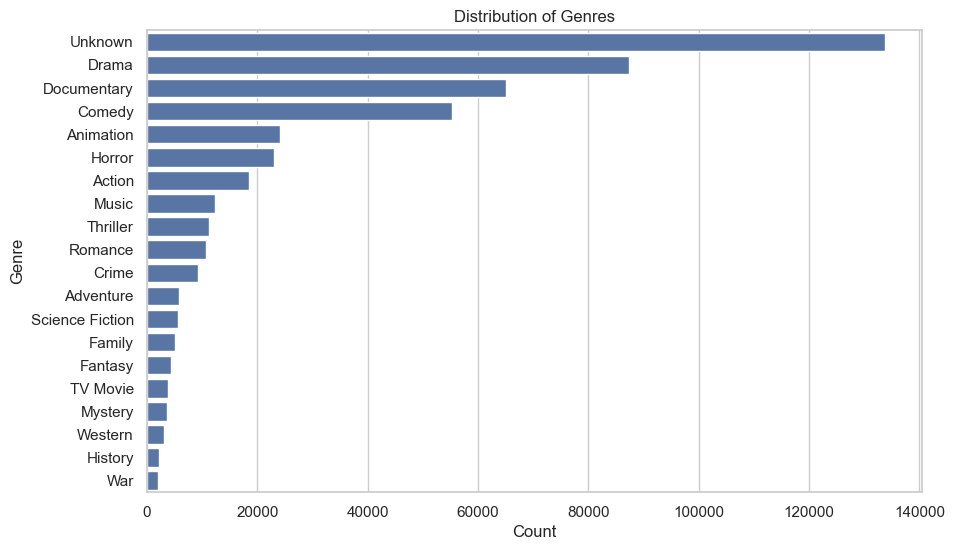

In [71]:
# Countplot for Genres (simplified as one genre per movie for this example)
df_cleaned['genres_list'] = df_cleaned['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')
plt.figure(figsize=(10,6))
sns.countplot(y='genres_list', data=df_cleaned, order=df_cleaned['genres_list'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [30]:
# Calculate correlations between numerical variables
numerical_columns = ['revenue', 'budget', 'runtime']

correlation_matrix = df_cleaned[numerical_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          revenue    budget   runtime
revenue  1.000000  0.674016  0.041499
budget   0.674016  1.000000  0.056955
runtime  0.041499  0.056955  1.000000


# Revenue and Budget (How does revenue depend on a movie's budget? outliers?)

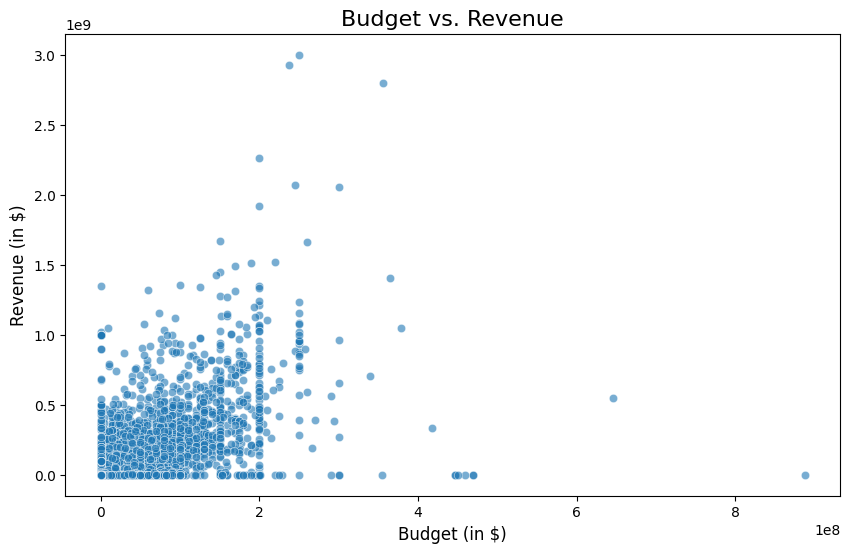

In [31]:
# Plot scatter plot for budget vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df_cleaned, alpha=0.6)
plt.title('Budget vs. Revenue', fontsize=16)
plt.xlabel('Budget (in $)', fontsize=12)
plt.ylabel('Revenue (in $)', fontsize=12)
plt.show()


# is there a relationship between movie rating and revenue?

In [32]:
# Remove rows with missing or zero values in 'vote_average' and 'revenue'
df_cleaned_1 = df_cleaned.dropna(subset=['vote_average', 'revenue'])  # Drop rows with NaN in these columns
df_cleaned_1 = df_cleaned[(df_cleaned['vote_average'] > 0) & (df_cleaned['revenue'] > 0)]  # Remove rows where these are zero

# Remove outliers for 'vote_average' (ratings should be between 0 and 10)
df_cleaned_1 = df_cleaned[(df_cleaned['vote_average'] >= 0) & (df_cleaned['vote_average'] <= 10)]





In [33]:
correlation = df_cleaned_1['vote_average'].corr(df_cleaned_1['revenue'])
print(f"Correlation between vote_average and revenue: {correlation}")


Correlation between vote_average and revenue: 0.04871230375677196


[Text(0.5, 1.0, 'Relationship between vote_average and revenue')]

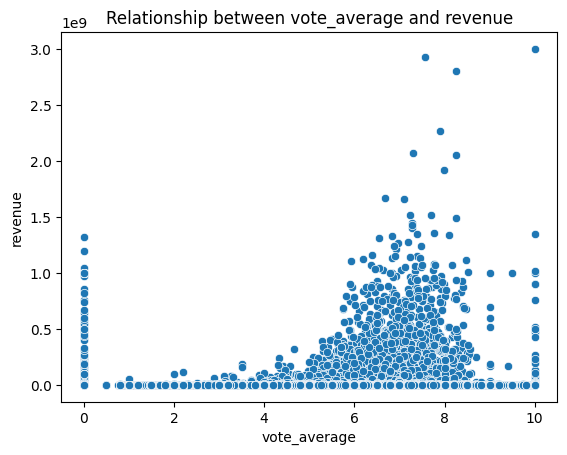

In [34]:
sns.scatterplot(data=df_cleaned_1, x='vote_average', y='revenue').set(title="Relationship between vote_average and revenue")


# which genre generated the highest revenue?

In [35]:
# Subset the data to relevant columns: 'genres' and 'revenue'
df_genre_revenue = df_cleaned[['genres', 'revenue']]

# Drop rows where either genre or revenue is missing
df_genre_revenue = df_genre_revenue.dropna()

# Group by genre and calculate total revenue for each genre
genre_revenue = df_genre_revenue.groupby('genres')['revenue'].sum().reset_index()

# Sort genres by revenue in descending order to find the highest
genre_revenue_sorted = genre_revenue.sort_values(by='revenue', ascending=False)

# Select top 10 genres for visualization
top_genre_revenue = genre_revenue_sorted.head(10)


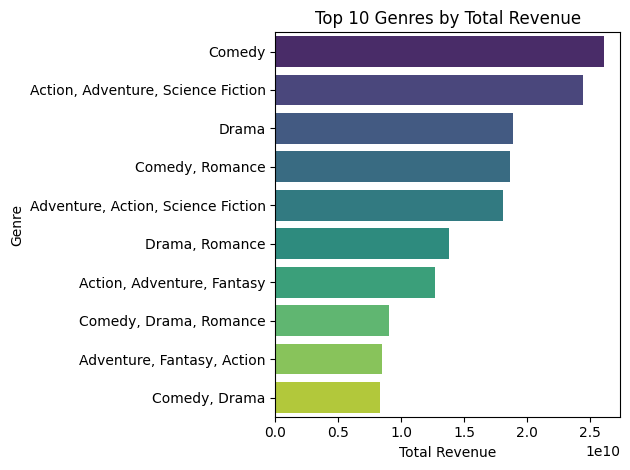

In [36]:
sns.barplot(data=top_genre_revenue, x='revenue', y='genres', palette='viridis')
plt.title('Top 10 Genres by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# how does runtime impact movie performance?

In [51]:
# Subset the data to relevant columns: 'runtime' and 'revenue'
df_runtime_revenue = df_cleaned[['runtime', 'ROI']]

# Drop rows where either runtime or revenue is missing
df_runtime_revenue = df_runtime_revenue.dropna()
df_runtime_revenue = df_runtime_revenue.head(15)


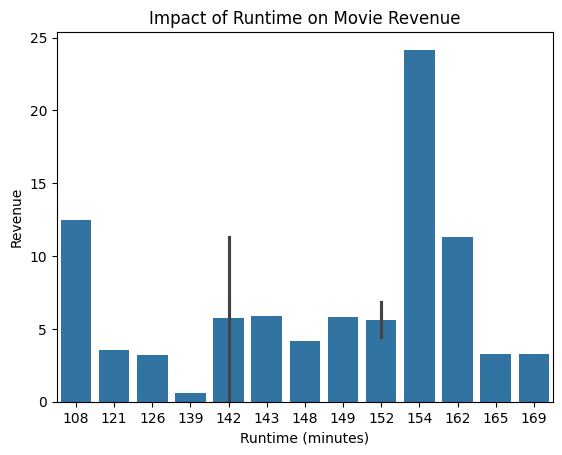

In [53]:

# plot to show the relationship between runtime and ROI
sns.barplot(data=df_runtime_revenue, x='runtime', y='ROI')
plt.title('Impact of Runtime on Movie Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


# which production companies produce the most succesful movies?

In [61]:
# Subset the data to relevant columns: 'production_companies' and 'roi'
df_production_roi = df_cleaned[['production_companies', 'vote_average']]

# Drop rows where either production companies or roi is missing
df_production_roi = df_production_roi.dropna()


In [62]:
# Group by production companies and calculate the total ROI for each company
company_roi = df_production_roi.groupby('production_companies')['vote_average'].sum().reset_index()

# Sort the production companies by total ROI in descending order
company_roi_sorted = company_roi.sort_values(by='vote_average', ascending=False)

# Select top 10 production companies with highest total ROI
top_company_roi = company_roi_sorted.head(10)


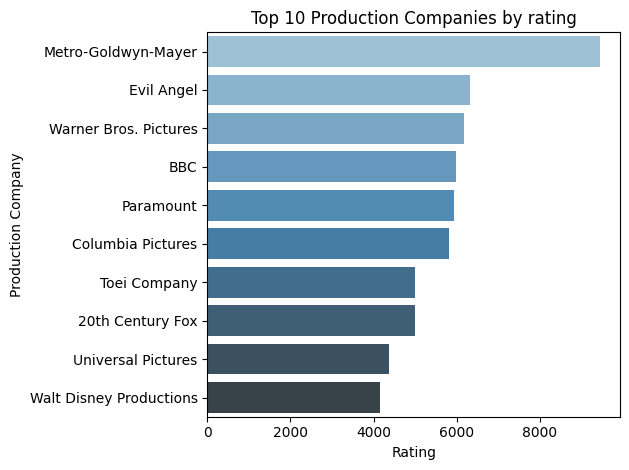

In [64]:
# Plot the top 10 production companies by total ROI
sns.barplot(data=top_company_roi, x='vote_average', y='production_companies', palette='Blues_d')
plt.title('Top 10 Production Companies by rating')
plt.xlabel('Rating')
plt.ylabel('Production Company')
plt.tight_layout()
plt.show()


# are movies released in certain months more popular? 

In [65]:
# Subset relevant columns: 'release_date' and 'popularity'
df_popularity_month = df_cleaned[['release_date', 'popularity']]

# Convert 'release_date' to datetime format
df_popularity_month['release_date'] = pd.to_datetime(df_popularity_month['release_date'])

# Extract month and year from 'release_date'
df_popularity_month['month'] = df_popularity_month['release_date'].dt.month


In [66]:
df_popularity_month_subset = df_popularity_month.head(1000)


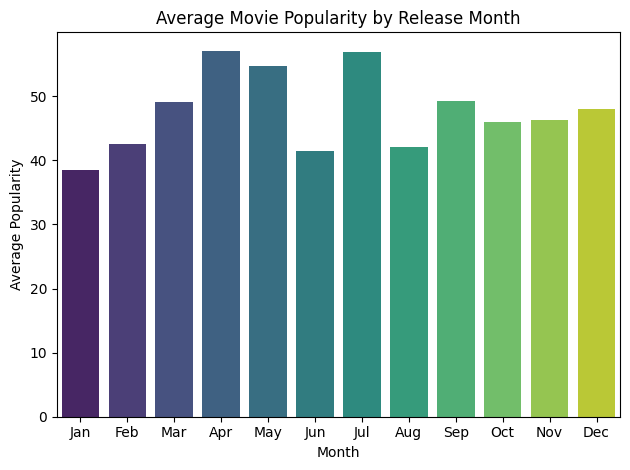

In [67]:
# Calculate the average popularity per month
month_popularity = df_popularity_month_subset.groupby('month')['popularity'].mean().reset_index()

# Plot the data
sns.barplot(data=month_popularity, x='month', y='popularity', palette='viridis')
plt.title('Average Movie Popularity by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


# Do certain original languages consistently get higher ratings?



In [68]:
df_lang_rating = df_cleaned[['original_language', 'vote_average']].dropna()

# Take top 10 most common languages to simplify the plot
top_langs = df_lang_rating['original_language'].value_counts().head(10).index
df_lang_rating = df_lang_rating[df_lang_rating['original_language'].isin(top_langs)]


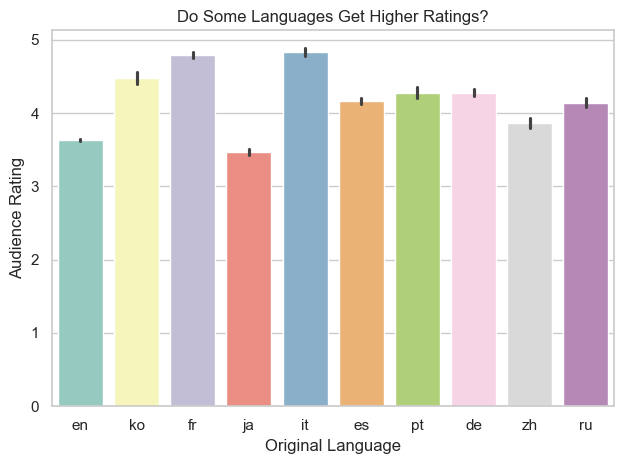

In [70]:
sns.set(style="whitegrid")
sns.barplot(data=df_lang_rating, x='original_language', y='vote_average', palette='Set3')

plt.title('Do Some Languages Get Higher Ratings?')
plt.xlabel('Original Language')
plt.ylabel('Audience Rating')
plt.tight_layout()
plt.show()


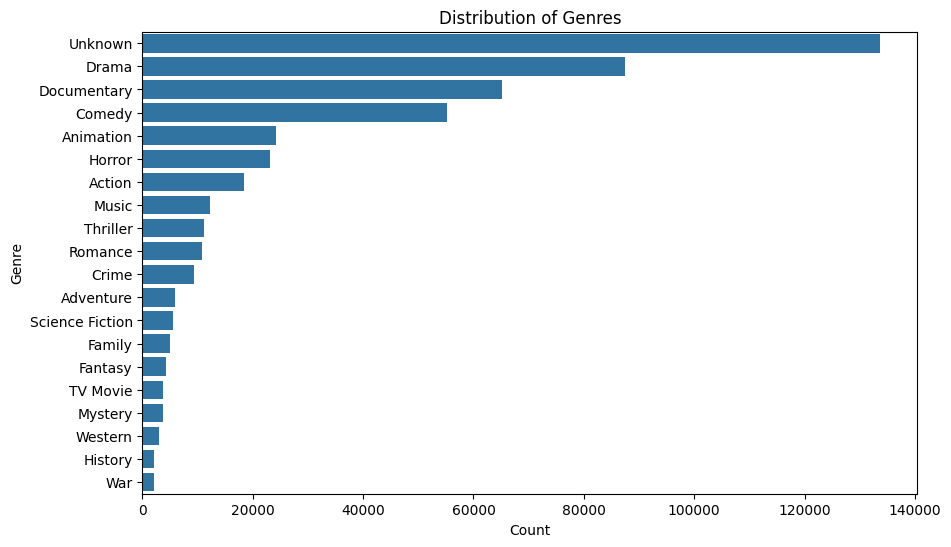

# Does a higher production budget always guarantee a better audience reception

In [72]:
subset_df = df_cleaned[['budget', 'vote_average']].dropna()
subset_df = subset_df[subset_df['budget'] > 0]
subset_df = subset_df.sort_values(by='budget', ascending=False).head(1000)


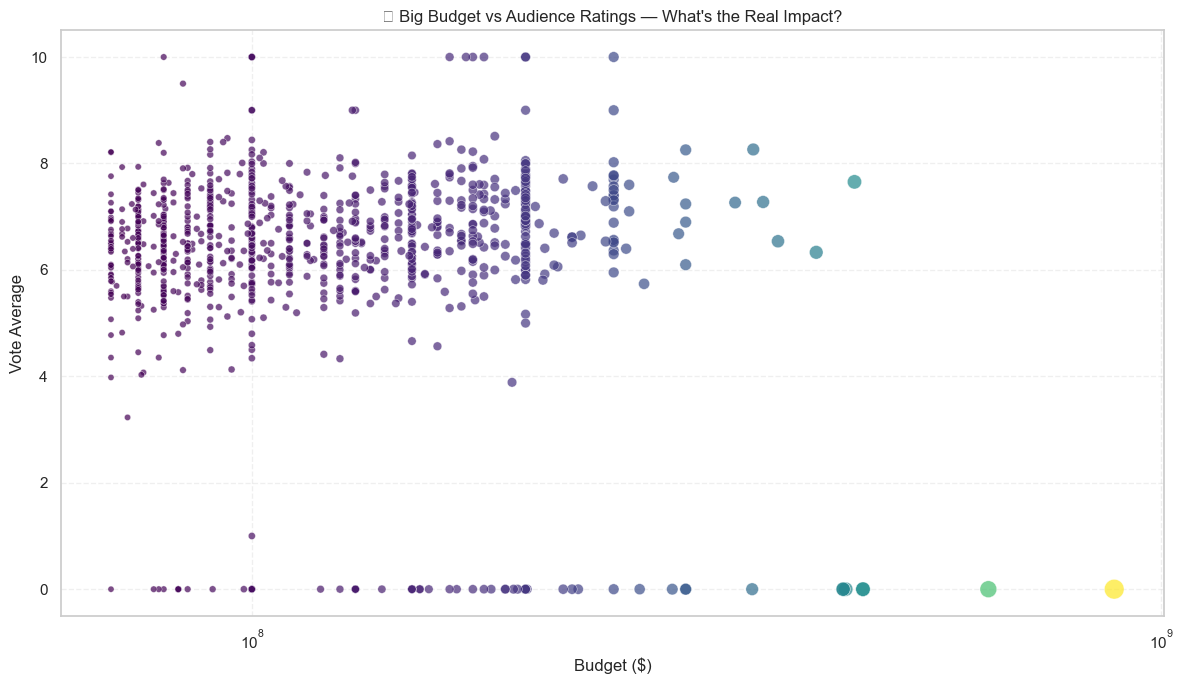

In [74]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=subset_df,
    x='budget',
    y='vote_average',
    hue='budget',
    palette='viridis',
    size='budget',
    sizes=(20, 200),
    alpha=0.7,
    legend=False
)

plt.title("Big Budget vs Audience Ratings — What's the Real Impact?")
plt.xlabel("Budget ($)")
plt.ylabel("Vote Average")
plt.xscale('log')  # Log scale to handle wide budget range
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
